In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
from pathlib import Path

In [5]:
#path = "/home/piai/Desktop/ocr/hanja/Hanja_crop/Hanja_crop_50_notsplit/"
path='/home/piai/Desktop/ocr/hanja/Hanja_crop/hanja_crop_50_notsplit (copy)/'
file_list = os.listdir(path)
len(file_list)

4893

In [6]:
file_nums = {}

for file_name in file_list:
    file_nums[file_name] = len(os.listdir(path+file_name))

In [7]:
file_nums

{'11514': 50,
 '10319': 50,
 '2106': 50,
 '10705': 50,
 '8724': 50,
 '4893': 50,
 '2039': 50,
 '6633': 50,
 '11390': 50,
 '5395': 50,
 '4973': 50,
 '8389': 50,
 '12467': 50,
 '10626': 50,
 '1851': 50,
 '3006': 50,
 '6601': 50,
 '7519': 50,
 '2127': 50,
 '246': 50,
 '1237': 50,
 '242': 50,
 '11463': 50,
 '1151': 50,
 '11305': 50,
 '1246': 50,
 '6028': 50,
 '3516': 50,
 '8770': 50,
 '9113': 50,
 '11852': 50,
 '4194': 50,
 '2951': 50,
 '526': 50,
 '3177': 50,
 '7890': 50,
 '6413': 50,
 '2102': 50,
 '10358': 50,
 '6555': 50,
 '9912': 50,
 '9548': 50,
 '4180': 50,
 '12383': 50,
 '278': 50,
 '9102': 50,
 '10149': 50,
 '7061': 50,
 '2931': 50,
 '5826': 50,
 '2608': 50,
 '4728': 50,
 '6273': 50,
 '9024': 50,
 '11854': 50,
 '5007': 50,
 '4585': 50,
 '9989': 50,
 '4215': 50,
 '8029': 50,
 '7130': 50,
 '11120': 50,
 '6229': 50,
 '3948': 50,
 '2018': 50,
 '11275': 50,
 '2124': 50,
 '1785': 50,
 '8434': 50,
 '5076': 50,
 '10275': 50,
 '1483': 50,
 '10186': 50,
 '5456': 50,
 '7207': 50,
 '4752': 50,

In [9]:
import albumentations as A
import cv2

# Declare an augmentation pipeline
transform = A.Compose([
    #A.RandomCrop(width=256, height=256),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
])

# Read an image with OpenCV and convert it to the RGB colorspace
image = cv2.imread("/home/piai/Desktop/test.jpg")

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Augment an image
transformed = transform(image=image)
transformed_image = transformed["image"]

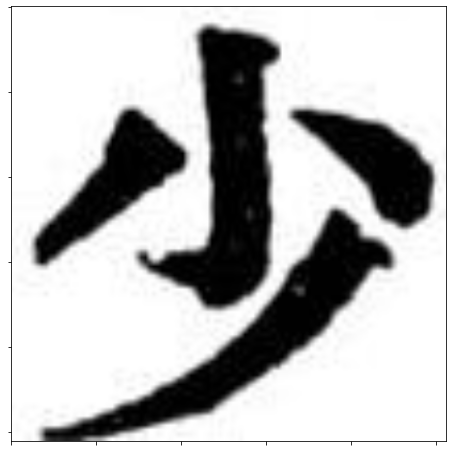

In [101]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from IPython.display import display, HTML 

from albumentations import (VerticalFlip, HorizontalFlip, Flip, RandomRotate90, Rotate, ShiftScaleRotate, CenterCrop, OpticalDistortion, GridDistortion, ElasticTransform, JpegCompression, HueSaturationValue,
                            RGBShift, RandomBrightness, RandomContrast, Blur, MotionBlur, MedianBlur, GaussNoise, CLAHE, ChannelShuffle, InvertImg, RandomGamma, ToGray, PadIfNeeded 
                           )


def show_img(img, figsize=(8, 8)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.grid(False)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.imshow(img)
    #plt.imshow(img)Togray
    plt.imshow(img)
    

def show_augmentation(img, augmenation, **params):
    params_code = ', '.join(f'{key}={value}' for key, value in params.items())
    if params_code:
      params_code += ', '
    text = HTML(
        'Use this augmentation in your code:'
        '<pre style="display:block; background-color: #eee; margin: 10px; padding: 10px;">'
        f'{augmenation.__class__.__name__}({params_code}p=0.5)'
        '</pre>'
    )
    display(text)
    show_img(img)
    

image = cv2.imread('/home/piai/Desktop/test.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (512, 512))

display(HTML('<h3>Original image</h3>'))
show_img(image)

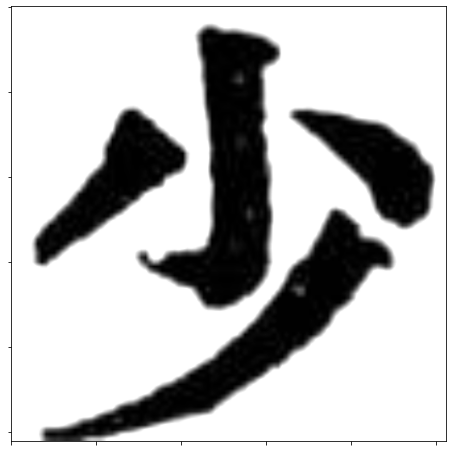

In [102]:
alpha = 1.2 #@param {type:"slider", min:0, max:5, step:0.1}
aug = RandomBrightness(p=0.5)
img = aug.apply(image, alpha=alpha)

show_augmentation(img, aug, limit=alpha)

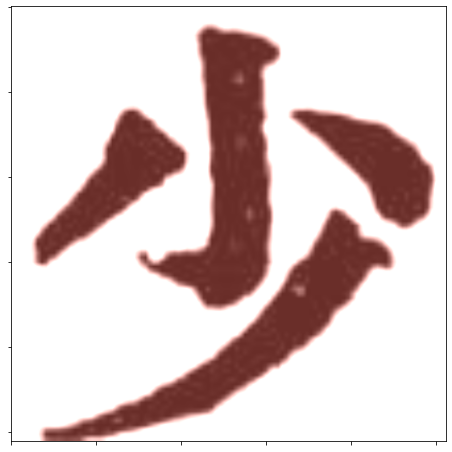

In [103]:
r_shift = 105 #@param {type:"slider", min:-255, max:255, step:1}
g_shift = 45 #@param {type:"slider", min:-255, max:255, step:1}
b_shift = 40 #@param {type:"slider", min:-255, max:255, step:1}

aug = RGBShift(p=1)
img = aug.apply(image, r_shift=r_shift, g_shift=g_shift, b_shift=b_shift)
show_augmentation(img, aug, r_shift_limit=abs(r_shift), g_shift_limit=abs(g_shift), b_shift_limit=abs(b_shift))

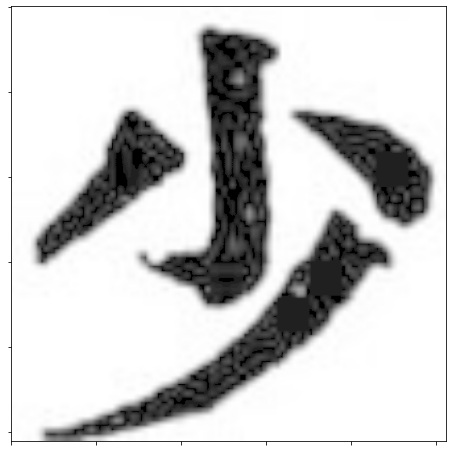

In [104]:
#@title RandomGamma { run: "auto", vertical-output: true, display-mode: "form" }
gamma = 37 #@param {type:"slider", min:0, max:255, step:1}
aug = RandomGamma(p=1)
image_for_augmentation = image.copy()
img = aug.apply(image_for_augmentation, gamma=gamma / 100)
show_augmentation(img, aug, gamma_limit=gamma)

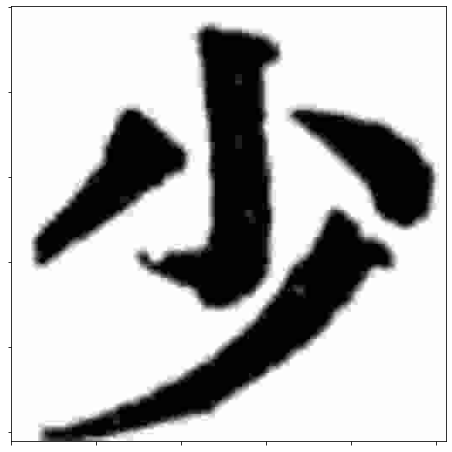

In [105]:
#@title JpegCompression { run: "auto", vertical-output: true, display-mode: "form" }
quality = 4 #@param {type:"slider", min:0, max:100, step:1}
aug = JpegCompression(p=1)
img = aug.apply(image, quality=quality)
show_augmentation(img, aug, quality_lower=quality, quality_upper=100)

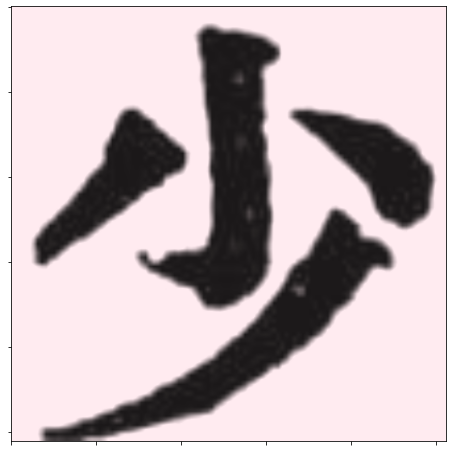

In [106]:
#@title HueSaturationValue { run: "auto", vertical-output: true, display-mode: "form" }
hue_shift = 172 #@param {type:"slider", min:0, max:180, step:1}
sat_shift = 20 #@param {type:"slider", min:0, max:255, step:1}
val_shift = 27 #@param {type:"slider", min:0, max:255, step:1}

aug = HueSaturationValue(p=1)
img = aug.apply(image, hue_shift=hue_shift, sat_shift=sat_shift, val_shift=val_shift)
show_augmentation(img, aug, hue_shift_limit=hue_shift, sat_shift_limit=sat_shift, val_shift_limit=val_shift)

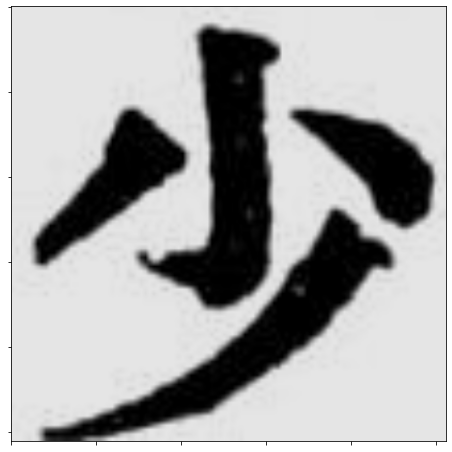

In [107]:
alpha = 0.9 #@param {type:"slider", min:0, max:3, step:0.1}
aug = RandomContrast(p=1)
img = aug.apply(image, alpha=alpha)
show_augmentation(img, aug, limit=alpha)

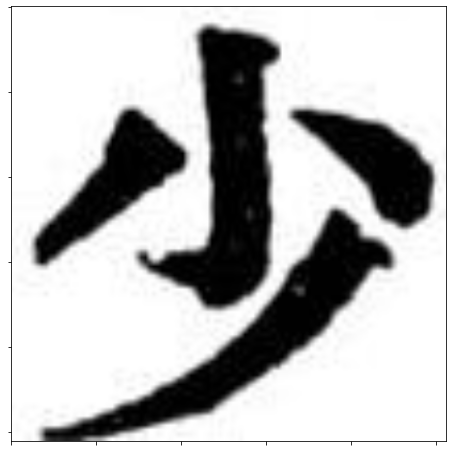

In [108]:
alpha = 0.4
aug = ChannelShuffle()
img = aug.apply(image, alpha = alpha)
show_augmentation(img, aug, limit=alpha)

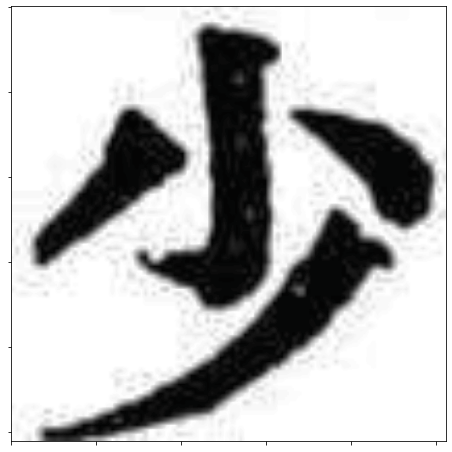

In [109]:
alpha = 0.4
aug = CLAHE()
img = aug.apply(image, alpha = alpha)
show_augmentation(img, aug, limit=alpha)

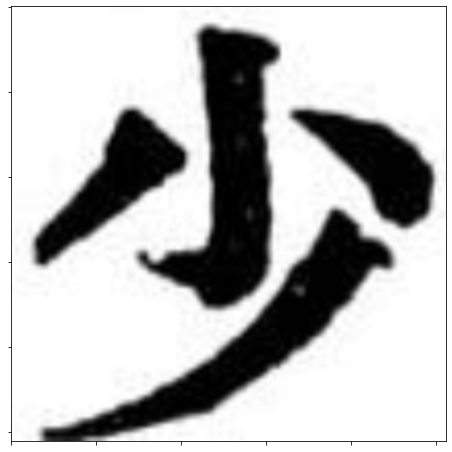

In [110]:
aug = Blur(p=0.9)
#img = aug.apply(image, alpha = alpha)
img = aug.apply(image)
#show_augmentation(img, aug, limit=alpha)
show_augmentation(img, aug)

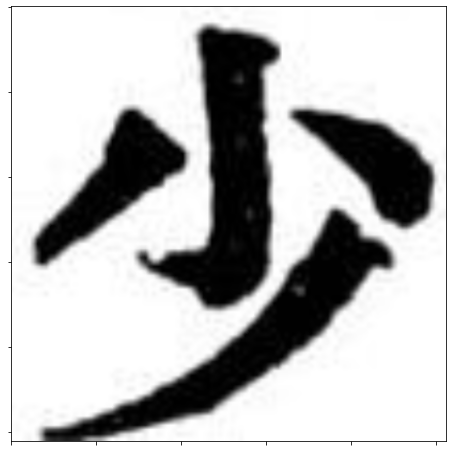

In [111]:
aug = MedianBlur(p=0.5)
#img = aug.apply(image, alpha = alpha)
img = aug.apply(image)
#show_augmentation(img, aug, limit=alpha)
show_augmentation(img, aug)

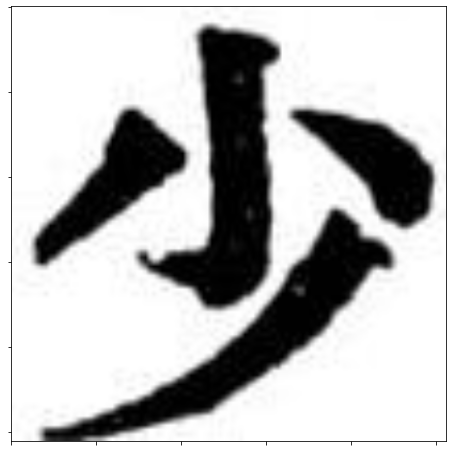

In [112]:
aug = ToGray()
#img = aug.apply(image, alpha = alpha)
img = aug.apply(image)
#show_augmentation(img, aug, limit=alpha)
show_augmentation(img, aug)

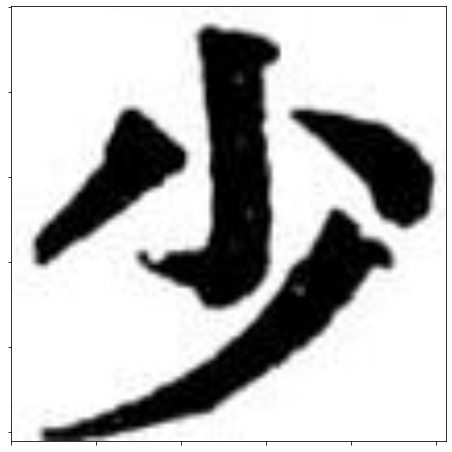

In [113]:
aug = JpegCompression(quality_lower=99, quality_upper=50, always_apply=False, p=0.5)
#img = aug.apply(image, alpha = alpha)
img = aug.apply(image)
#show_augmentation(img, aug, limit=alpha)
show_augmentation(img, aug)

<Figure size 432x288 with 0 Axes>

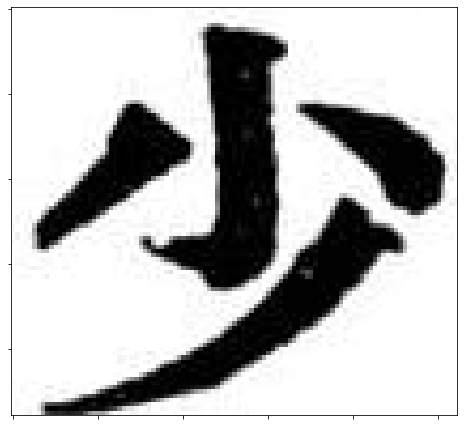

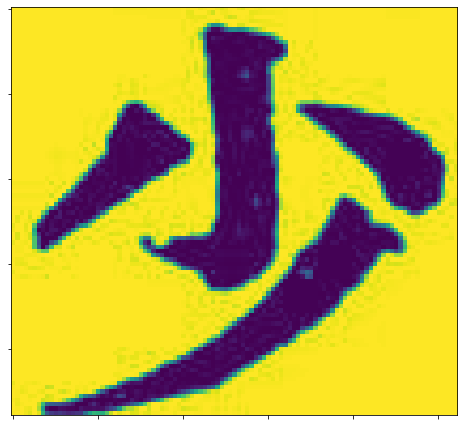

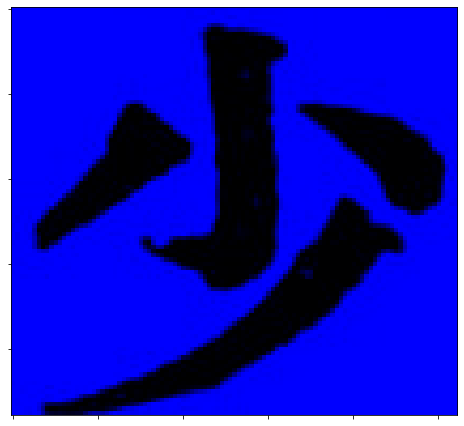

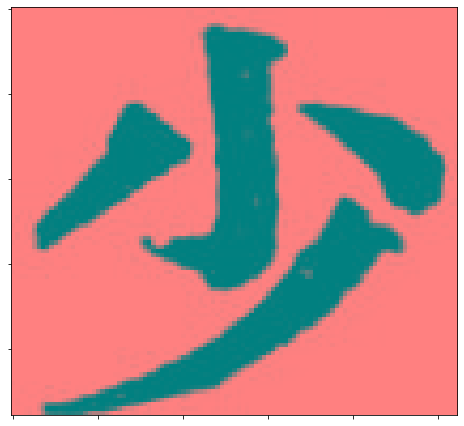

In [114]:
import numpy as np
import cv2

# 같은 디렉토리 내의 "mountain.jpg"라는 이미지 불러오기
#image = cv2.imread("mountain.jpg")
image = cv2.imread('/home/piai/Desktop/test.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


fig = plt.figure()
rows= 4
cols =3

img1 = image
img2 = temp

display(HTML('<h3>Original image</h3>'))
show_img(image)
#cv2.cvShowImage("Original", image)

# 회색조로 바꾸기
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show_img(gray)
#cv2.cvShowImage("Gray", gray)

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
show_img(hsv)
#cv2.cvShowImage("HSV", hsv)

lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
show_img(lab)
# cv2.cvShowImage("L*a*b*", lab)
# cv2.waitKey(0)


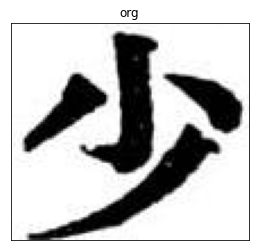

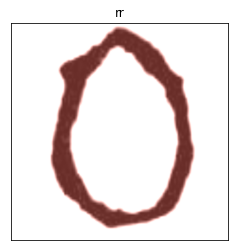

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 105 and the array at index 1 has size 512

In [115]:
import matplotlib.image as img 
import matplotlib.pyplot as plt

#image = cv2.imread('/home/piai/Desktop/test.jpg')

fileName = '/home/piai/Desktop/test.jpg'
#ndarray = img.imread(fileName) 
ndarray = cv2.imread(fileName) 
ndarray = cv2.cvtColor(ndarray, cv2.COLOR_BGR2RGB)

plt.title('org')

#plt.axis('off')
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.imshow(ndarray) 
plt.show()


plt.title('rr')
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.imshow(temp) 
plt.show()

concat1 = np.concatenate( ( ndarray, temp), axis = 0)




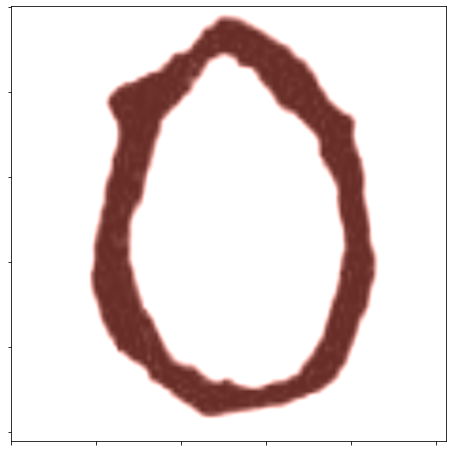

In [89]:
r_shift = 105 #@param {type:"slider", min:-255, max:255, step:1}
g_shift = 45 #@param {type:"slider", min:-255, max:255, step:1}
b_shift = 40 #@param {type:"slider", min:-255, max:255, step:1}

aug = RGBShift(p=1)
img = aug.apply(image, r_shift=r_shift, g_shift=g_shift, b_shift=b_shift)
temp = img
show_augmentation(img, aug, r_shift_limit=abs(r_shift), g_shift_limit=abs(g_shift), b_shift_limit=abs(b_shift))

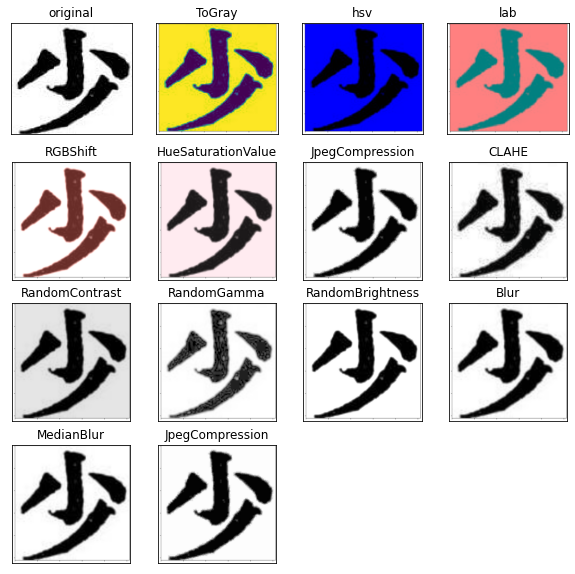

In [126]:
fig = plt.figure(figsize=(10,10))
rows = 4
cols = 4
img1 = cv2.imread('/home/piai/Desktop/test.jpg')
img2 = cv2.imread('/home/piai/Desktop/ToGray.png')
img3 = cv2.imread('/home/piai/Desktop/hsv.png')
img4 = cv2.imread('/home/piai/Desktop/lab.png')
img5 = cv2.imread('/home/piai/Desktop/RGBShift.png')
img6 = cv2.imread('/home/piai/Desktop/HueSaturationValue.png')
img7 = cv2.imread('/home/piai/Desktop/ChannelShupple.png')
img8 = cv2.imread('/home/piai/Desktop/CLAHE.png')
img9 = cv2.imread('/home/piai/Desktop/RandomContrast.png')
img10 = cv2.imread('/home/piai/Desktop/RandomGamma.png')
img11 = cv2.imread('/home/piai/Desktop/RandomBrightness.png')
img12 = cv2.imread('/home/piai/Desktop/Blur.png')
img13 = cv2.imread('/home/piai/Desktop/MedianBlur.png')
img14 = cv2.imread('/home/piai/Desktop/JpegCompression.png')


ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
ax1.axes.xaxis.set_visible(False)
ax1.axes.yaxis.set_visible(False)
ax1.set_title('original')


ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax2.axes.xaxis.set_visible(False)
ax2.axes.yaxis.set_visible(False)
ax2.set_title('ToGray')


ax3 = fig.add_subplot(rows, cols, 3)
ax3.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
ax3.axes.xaxis.set_visible(False)
ax3.axes.yaxis.set_visible(False)
ax3.set_title('hsv')

ax4 = fig.add_subplot(rows, cols, 4)
ax4.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))
ax4.axes.xaxis.set_visible(False)
ax4.axes.yaxis.set_visible(False)
ax4.set_title('lab')

ax5 = fig.add_subplot(rows, cols, 5)
ax5.imshow(cv2.cvtColor(img5, cv2.COLOR_BGR2RGB))
ax5.axes.xaxis.set_visible(False)
ax5.axes.yaxis.set_visible(False)
ax5.set_title('RGBShift')


ax6 = fig.add_subplot(rows, cols, 6)
ax6.imshow(cv2.cvtColor(img6, cv2.COLOR_BGR2RGB))
ax6.axes.xaxis.set_visible(False)
ax6.axes.yaxis.set_visible(False)
ax6.set_title('HueSaturationValue')

ax7 = fig.add_subplot(rows, cols, 7)
ax7.imshow(cv2.cvtColor(img14, cv2.COLOR_BGR2RGB))
#ax7.imshow(img7)
ax7.axes.xaxis.set_visible(False)
ax7.axes.yaxis.set_visible(False)
ax7.set_title('JpegCompression')


ax8 = fig.add_subplot(rows, cols, 8)
ax8.imshow(cv2.cvtColor(img8, cv2.COLOR_BGR2RGB))
ax8.axes.xaxis.set_visible(False)
ax8.axes.yaxis.set_visible(False)
ax8.set_title('CLAHE')

ax9 = fig.add_subplot(rows, cols, 9)
ax9.imshow(cv2.cvtColor(img9, cv2.COLOR_BGR2RGB))
ax9.axes.xaxis.set_visible(False)
ax9.axes.yaxis.set_visible(False)
ax9.set_title('RandomContrast')

ax10 = fig.add_subplot(rows, cols, 10)
ax10.imshow(cv2.cvtColor(img10, cv2.COLOR_BGR2RGB))
ax10.axes.xaxis.set_visible(False)
ax10.axes.yaxis.set_visible(False)
ax10.set_title('RandomGamma')


ax11 = fig.add_subplot(rows, cols, 11)
ax11.imshow(cv2.cvtColor(img11, cv2.COLOR_BGR2RGB))
ax11.axes.xaxis.set_visible(False)
ax11.axes.yaxis.set_visible(False)
ax11.set_title('RandomBrightness')

ax12 = fig.add_subplot(rows, cols, 12)
ax12.imshow(cv2.cvtColor(img12, cv2.COLOR_BGR2RGB))
ax12.axes.xaxis.set_visible(False)
ax12.axes.yaxis.set_visible(False)
ax12.set_title('Blur')

ax13 = fig.add_subplot(rows, cols, 13)
ax13.imshow(cv2.cvtColor(img13, cv2.COLOR_BGR2RGB))
ax13.axes.xaxis.set_visible(False)
ax13.axes.yaxis.set_visible(False)
ax13.set_title('MedianBlur')

ax14 = fig.add_subplot(rows, cols, 14)
ax14.imshow(cv2.cvtColor(img14, cv2.COLOR_BGR2RGB))
ax14.axes.xaxis.set_visible(False)
ax14.axes.yaxis.set_visible(False)
ax14.set_title('JpegCompression')

# ax15 = fig.add_subplot(rows, cols, 2)
# ax15.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
# ax15.axes.xaxis.set_visible(False)
# ax15.axes.yaxis.set_visible(False)
# ax15.set_title('ToGray')

plt.show()

#img3 = cv2.imread()